In [5]:
# import Pandas and Numpy packages

import pandas as pd

import numpy as np

import seaborn as sns

sns.set_theme(palette="Set2")

In [6]:
data = pd.read_csv("df.csv")
data.head()

,trans_date_trans_time,credit_card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,latitude,longitude,city_population,job,day_of_birth,trans_number,unix_time,merchant_lat,merchant_long,fraud
0,2/1/2021 0:02,4.750000e+12,fraud_Kling-Grant,grocery_net,19.46,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,...,41.4802,-86.6919,1423,"Psychologist, forensic",10/7/1998,0442179ed2d64942bc45c5442c3d5895,1328054544,41.587290,-87.582956,0
1,2/1/2021 0:03,4.330000e+15,fraud_Huel-Langworth,misc_net,13.01,Scott,Martin,M,7483 Navarro Flats,Freedom,...,43.0172,-111.0292,471,"Education officer, museum",8/2/1967,ef5b8cbad64ceecb8d1b81960a49b467,1328054607,42.032369,-111.700448,0
2,2/1/2021 0:05,4.720000e+18,"fraud_Streich, Hansen and Veum",gas_transport,50.02,Robert,Drake,M,463 Willie Estates,Burbank,...,36.6966,-96.7869,471,Sub,3/30/1941,eae42972de9670a3d907035c0594d494,1328054744,36.413203,-95.986495,0
3,2/1/2021 0:06,1.800000e+14,fraud_Johns Inc,entertainment,6.11,Jared,Camacho,M,4257 Perez Mall,Canton,...,40.8027,-81.3739,192805,Building control surveyor,6/30/1963,2832eb7d75a6f04468c3e52b03103090,1328054781,40.576060,-81.529672,0
4,2/1/2021 0:08,4.540000e+18,fraud_Spinka Inc,grocery_net,32.14,Nathan,Mendoza,M,767 Adam Mill Apt. 115,Espanola,...,35.9866,-106.0654,18408,Historic buildings inspector/conservation officer,7/18/1972,345575e8bebaaed20c5ded6694383a3a,1328054900,35.125220,-105.981956,0


In [7]:
import pandas as pd
from datetime import datetime


# Change 'trans_date_trans_time' to datetime format
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Convert 'day_of_birth' to datetime format
data['day_of_birth'] = pd.to_datetime(data['day_of_birth'])

# Calculate 'age' based on 'day_of_birth'
current_date = datetime.now()
data['age'] = current_date.year - data['day_of_birth'].dt.year

# Drop the original 'day_of_birth' column
data.drop(columns=['day_of_birth'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975036 entries, 0 to 975035
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  975036 non-null  datetime64[ns]
 1   credit_card_number     975036 non-null  float64       
 2   merchant               975036 non-null  object        
 3   category               975036 non-null  object        
 4   amount                 975036 non-null  float64       
 5   first_name             975036 non-null  object        
 6   last_name              975036 non-null  object        
 7   gender                 975036 non-null  object        
 8   street                 975036 non-null  object        
 9   city                   975036 non-null  object        
 10  state                  975036 non-null  object        
 11  zip_code               975036 non-null  int64         
 12  latitude               975036 non-null  floa

In [8]:
# Extract date, month, year, and hour into separate columns
data['transaction_date'] = data['trans_date_trans_time'].dt.day
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

 

# Drop the original transaction date and time column if needed
data.drop(columns=['trans_date_trans_time'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975036 entries, 0 to 975035
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   credit_card_number  975036 non-null  float64
 1   merchant            975036 non-null  object 
 2   category            975036 non-null  object 
 3   amount              975036 non-null  float64
 4   first_name          975036 non-null  object 
 5   last_name           975036 non-null  object 
 6   gender              975036 non-null  object 
 7   street              975036 non-null  object 
 8   city                975036 non-null  object 
 9   state               975036 non-null  object 
 10  zip_code            975036 non-null  int64  
 11  latitude            975036 non-null  float64
 12  longitude           975036 non-null  float64
 13  city_population     975036 non-null  int64  
 14  job                 975036 non-null  object 
 15  trans_number        975036 non-nul

In [9]:
# List of irrelevant columns
irrelevant_columns = ['credit_card_number', 'first_name', 'last_name', 'street', 'state', 
                      'merchant_lat', 'merchant_long', 'trans_number', 'longitude', 'city_population', 
                      'latitude', 'merchant', 'zip_code', 'job', 'city']

# Drop the irrelevant columns from the training data
data1 = data.drop(irrelevant_columns, axis=1)

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975036 entries, 0 to 975035
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   category           975036 non-null  object 
 1   amount             975036 non-null  float64
 2   gender             975036 non-null  object 
 3   unix_time          975036 non-null  int64  
 4   fraud              975036 non-null  int64  
 5   age                975036 non-null  int64  
 6   transaction_date   975036 non-null  int64  
 7   transaction_month  975036 non-null  int64  
 8   transaction_year   975036 non-null  int64  
 9   transaction_hour   975036 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 74.4+ MB


In [10]:
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = data1.drop(['fraud'], axis=1)  # Features (all columns except 'fraud')
y = data1['fraud']  # Target variable

print("Dataset Shape:", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("Train and Test Shape:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Dataset Shape: (975036, 9) (975036,)
Train and Test Shape: (780028, 9) (195008, 9) (780028,) (195008,)


In [11]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical variables to numerical representations
label_encoder = LabelEncoder()
categorical_columns = ['category', 'gender']
for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])

X_train.head()

,category,amount,gender,unix_time,age,transaction_date,transaction_month,transaction_year,transaction_hour
664639,1,2.43,1,1351881614,36,2,11,2021,18
183150,11,129.36,0,1335634920,30,28,4,2021,17
95256,7,141.70,1,1332282671,38,20,3,2021,22
270029,2,49.39,0,1338717763,81,3,6,2021,10
553745,10,5.40,0,1347662896,78,14,9,2021,22


In [12]:
pip install imbalanced-learn


In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert categorical variables to numerical representations
label_encoder = LabelEncoder()
categorical_columns = ['category', 'gender']
for col in categorical_columns:
    X_test[col] = label_encoder.fit_transform(X_test[col])

X_test.head()

,category,amount,gender,unix_time,age,transaction_date,transaction_month,transaction_year,transaction_hour
15064,3,41.81,1,1328834856,29,10,2,2021,0
731356,2,44.39,0,1354321468,60,1,12,2021,0
146716,4,94.71,1,1334275468,36,13,4,2021,0
971597,1,61.64,1,1362059121,41,28,2,2022,13
483782,5,55.60,1,1345296600,92,18,8,2021,13


In [14]:

from imblearn.under_sampling import RandomUnderSampler

# Create the RandomUnderSampler object
under_sampler = RandomUnderSampler()

# Perform undersampling on the dataset
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)

# Create a new DataFrame with the undersampled data
undersampled_train_data = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Print the shape of the undersampled data to verify the balance
print("Shape of the undersampled data:", undersampled_train_data.shape)


Shape of the undersampled data: (8658, 10)


In [11]:
undersampled_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8658 entries, 44430 to 128896
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8658 non-null   int32  
 1   amount             8658 non-null   float64
 2   gender             8658 non-null   int32  
 3   unix_time          8658 non-null   int64  
 4   age                8658 non-null   int64  
 5   transaction_date   8658 non-null   int64  
 6   transaction_month  8658 non-null   int64  
 7   transaction_year   8658 non-null   int64  
 8   transaction_hour   8658 non-null   int64  
 9   fraud              8658 non-null   int64  
dtypes: float64(1), int32(2), int64(7)
memory usage: 676.4 KB


# UNDERSAMPLED DATASET ANALYSIS

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the DecisionTreeClassifier object
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree model using the training data
decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9606990482441746
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    193925
           1       0.12      0.96      0.21      1083

    accuracy                           0.96    195008
   macro avg       0.56      0.96      0.60    195008
weighted avg       0.99      0.96      0.98    195008

Confusion Matrix:
[[186304   7621]
 [    43   1040]]


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the DecisionTreeClassifier object
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their possible values to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the decision tree model with the best hyperparameters on the full training data
best_decision_tree_model = DecisionTreeClassifier(**best_params, random_state=42)
best_decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data using the best model
y_pred = best_decision_tree_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
Best Model Accuracy: 0.9711140055792583
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    193925
           1       0.16      0.95      0.27      1083

    accuracy                           0.97    195008
   macro avg       0.58      0.96      0.63    195008
weighted avg       1.00      0.97      0.98    195008

Confusion Matrix for Best Model:
[[188349   5576]
 [    57   1026]]


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the DecisionTreeClassifier object with the best hyperparameters found earlier
best_decision_tree_model = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                                  max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Create the AdaBoostClassifier object, using the decision tree model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=best_decision_tree_model, random_state=42)

# Train the AdaBoostClassifier on the training data
adaboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for AdaBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for AdaBoost Model:")
print(confusion_matrix(y_test, y_pred))


AdaBoost Model Accuracy: 0.9738369707909419
Classification Report for AdaBoost Model:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    193925
           1       0.17      0.96      0.29      1083

    accuracy                           0.97    195008
   macro avg       0.59      0.97      0.64    195008
weighted avg       1.00      0.97      0.98    195008

Confusion Matrix for AdaBoost Model:
[[188861   5064]
 [    38   1045]]


In [15]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the CatBoostClassifier object, using the decision tree model as the base estimator
catboost_model = CatBoostClassifier(random_seed=42, verbose=False)

# Train the CatBoostClassifier on the training data
catboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = catboost_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for CatBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for CatBoost Model:")
print(confusion_matrix(y_test, y_pred))


CatBoost Model Accuracy: 0.9779034706268461
Classification Report for CatBoost Model:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    193925
           1       0.20      0.97      0.33      1083

    accuracy                           0.98    195008
   macro avg       0.60      0.97      0.66    195008
weighted avg       1.00      0.98      0.99    195008

Confusion Matrix for CatBoost Model:
[[189647   4278]
 [    31   1052]]


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the GradientBoostingClassifier object, using the decision tree model as the base estimator
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the GradientBoostingClassifier on the training data
gradient_boosting_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for Gradient Boosting Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Gradient Boosting Model:")
print(confusion_matrix(y_test, y_pred))


Gradient Boosting Model Accuracy: 0.9678884968821792
Classification Report for Gradient Boosting Model:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    193925
           1       0.14      0.96      0.25      1083

    accuracy                           0.97    195008
   macro avg       0.57      0.96      0.62    195008
weighted avg       0.99      0.97      0.98    195008

Confusion Matrix for Gradient Boosting Model:
[[187711   6214]
 [    48   1035]]


In [24]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the XGBClassifier object, using the decision tree model as the base estimator
xgb_model = xgb.XGBClassifier(base_estimator=best_decision_tree_model, random_state=42)

# Train the XGBClassifier on the training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for XGBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for XGBoost Model:")
print(confusion_matrix(y_test, y_pred))


[13:00:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator" } are not used.

XGBoost Model Accuracy: 0.9760984164752216
Classification Report for XGBoost Model:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    193925
           1       0.19      0.97      0.31      1083

    accuracy                           0.98    195008
   macro avg       0.59      0.97      0.65    195008
weighted avg       1.00      0.98      0.98    195008

Confusion Matrix for XGBoost Model:
[[189296   4629]
 [    32   1051]]


In [26]:
pip install lightgbm


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the LGBMClassifier object, using the decision tree model as the base estimator
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the LGBMClassifier on the training data
lgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = lgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("LightGBM Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for LightGBM Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for LightGBM Model:")
print(confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Number of positive: 4329, number of negative: 4329
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 8658, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Model Accuracy: 0.9771752953724976
Classification Report for LightGBM Model:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    193925
           1       0.19      0.97      0.32      1083

    accuracy                           0.98    195008
   macro avg       0.60      0.97      0.65    195008
weighted avg       1.00      0.98      0.98    195008

Confusion Matrix for LightGBM Model:
[[189510   4415]
 [    36   1047]]


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Random Forest Model:")
print(confusion_matrix(y_test, y_pred))


Random Forest Model Accuracy: 0.9743292582868395
Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    193925
           1       0.17      0.96      0.29      1083

    accuracy                           0.97    195008
   macro avg       0.59      0.97      0.64    195008
weighted avg       1.00      0.97      0.98    195008

Confusion Matrix for Random Forest Model:
[[188962   4963]
 [    43   1040]]


#    ORIGINAL DATASET ANALYSIS

###### Base Model

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the DecisionTreeClassifier object
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree model using the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9977180423367247
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193925
           1       0.78      0.82      0.80      1083

    accuracy                           1.00    195008
   macro avg       0.89      0.91      0.90    195008
weighted avg       1.00      1.00      1.00    195008

Confusion Matrix:
[[193678    247]
 [   198    885]]


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the DecisionTreeClassifier object
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters and their possible values to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the decision tree model with the best hyperparameters on the full training data
best_decision_tree_model = DecisionTreeClassifier(**best_params, random_state=42)
best_decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred = best_decision_tree_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best Model Accuracy: 0.9986410813915326
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193925
           1       0.94      0.81      0.87      1083

    accuracy                           1.00    195008
   macro avg       0.97      0.90      0.93    195008
weighted avg       1.00      1.00      1.00    195008

Confusion Matrix for Best Model:
[[193871     54]
 [   211    872]]


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the DecisionTreeClassifier object with the best hyperparameters found earlier
best_decision_tree_model = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                                  max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)

# Create the AdaBoostClassifier object, using the decision tree model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=best_decision_tree_model, random_state=42)

# Train the AdaBoostClassifier on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for AdaBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for AdaBoost Model:")
print(confusion_matrix(y_test, y_pred))

AdaBoost Model Accuracy: 0.9985692894650476
Classification Report for AdaBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193925
           1       0.95      0.78      0.86      1083

    accuracy                           1.00    195008
   macro avg       0.98      0.89      0.93    195008
weighted avg       1.00      1.00      1.00    195008

Confusion Matrix for AdaBoost Model:
[[193885     40]
 [   239    844]]


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the CatBoostClassifier object, using the decision tree model as the base estimator
catboost_model = CatBoostClassifier(random_seed=42, verbose=False)

# Train the CatBoostClassifier on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = catboost_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for CatBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for CatBoost Model:")
print(confusion_matrix(y_test, y_pred))

CatBoost Model Accuracy: 0.9987744092550049
Classification Report for CatBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193925
           1       0.94      0.83      0.88      1083

    accuracy                           1.00    195008
   macro avg       0.97      0.92      0.94    195008
weighted avg       1.00      1.00      1.00    195008

Confusion Matrix for CatBoost Model:
[[193869     56]
 [   183    900]]


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the GradientBoostingClassifier object, using the decision tree model as the base estimator
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the GradientBoostingClassifier on the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for Gradient Boosting Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Gradient Boosting Model:")
print(confusion_matrix(y_test, y_pred))

Gradient Boosting Model Accuracy: 0.9957540203478832
Classification Report for Gradient Boosting Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193925
           1       0.78      0.33      0.46      1083

    accuracy                           1.00    195008
   macro avg       0.89      0.66      0.73    195008
weighted avg       1.00      1.00      0.99    195008

Confusion Matrix for Gradient Boosting Model:
[[193823    102]
 [   726    357]]


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the XGBClassifier object, using the decision tree model as the base estimator
xgb_model = xgb.XGBClassifier(base_estimator=best_decision_tree_model, random_state=42)

# Train the XGBClassifier on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for XGBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for XGBoost Model:")
print(confusion_matrix(y_test, y_pred))

[12:35:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "base_estimator" } are not used.

XGBoost Model Accuracy: 0.9987333852970135
Classification Report for XGBoost Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193925
           1       0.94      0.82      0.88      1083

    accuracy                           1.00    195008
   macro avg       0.97      0.91      0.94    195008
weighted avg       1.00      1.00      1.00    195008

Confusion Matrix for XGBoost Model:
[[193873     52]
 [   195    888]]


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the LGBMClassifier object, using the decision tree model as the base estimator
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the LGBMClassifier on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("LightGBM Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for LightGBM Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for LightGBM Model:")
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 4329, number of negative: 775699
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 780028, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005550 -> initscore=-5.188428
[LightGBM] [Info] Start training from score -5.188428
LightGBM Model Accuracy: 0.9975488185100099
Classification Report for LightGBM Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193925
           1       0.79      0.76      0.78      1083

    accuracy                           1.00    195008
   macro avg       0.89      0.88      0.89    195008
weighted avg       1.00      1.00      1.00    195008

Confusion Matrix for LightG

# OVERSAMPLING DATASET

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Create the SMOTE object
smote = SMOTE(random_state=42)

# Perform oversampling on the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Create a new DataFrame with the oversampled data
oversampled_train_data = pd.concat([X_train_oversampled, y_train_oversampled], axis=1)

# Print the shape of the oversampled data to verify the balance
print("Shape of the oversampled data:", oversampled_train_data.shape)


Shape of the oversampled data: (1551398, 10)


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the DecisionTreeClassifier object
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree model with the best hyperparameters on the full training data
best_decision_tree_model = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                                  max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

best_decision_tree_model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the testing data using the best model
y_pred = best_decision_tree_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred))


Best Model Accuracy: 0.9677295290449622
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    193925
           1       0.14      0.91      0.24      1083

    accuracy                           0.97    195008
   macro avg       0.57      0.94      0.61    195008
weighted avg       0.99      0.97      0.98    195008

Confusion Matrix for Best Model:
[[187726   6199]
 [    94    989]]


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the DecisionTreeClassifier object with the best hyperparameters found earlier
best_decision_tree_model = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                                  max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)

# Create the AdaBoostClassifier object, using the decision tree model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=best_decision_tree_model, random_state=42)

# Train the AdaBoostClassifier on the training data
adaboost_model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the testing data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for AdaBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for AdaBoost Model:")
print(confusion_matrix(y_test, y_pred))

AdaBoost Model Accuracy: 0.9914670167377748
Classification Report for AdaBoost Model:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    193925
           1       0.37      0.79      0.51      1083

    accuracy                           0.99    195008
   macro avg       0.69      0.89      0.75    195008
weighted avg       1.00      0.99      0.99    195008

Confusion Matrix for AdaBoost Model:
[[192486   1439]
 [   225    858]]


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the CatBoostClassifier object, using the decision tree model as the base estimator
catboost_model = CatBoostClassifier(random_seed=42, verbose=False)

# Train the CatBoostClassifier on the training data
catboost_model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the testing data
y_pred = catboost_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for CatBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for CatBoost Model:")
print(confusion_matrix(y_test, y_pred))

NameError: name 'X_train_oversampled' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the GradientBoostingClassifier object, using the decision tree model as the base estimator
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the GradientBoostingClassifier on the training data
gradient_boosting_model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the testing data
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for Gradient Boosting Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Gradient Boosting Model:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the XGBClassifier object, using the decision tree model as the base estimator
xgb_model = xgb.XGBClassifier(base_estimator=best_decision_tree_model, random_state=42)

# Train the XGBClassifier on the training data
xgb_model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for XGBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for XGBoost Model:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the LGBMClassifier object, using the decision tree model as the base estimator
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the LGBMClassifier on the training data
lgb_model.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the testing data
y_pred = lgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("LightGBM Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for LightGBM Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for LightGBM Model:")
print(confusion_matrix(y_test, y_pred))

# HYBRID-SAMPLING DATASET

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN  # Import SMOTEENN class for the hybrid method


# Create the SMOTE-ENN object
smote_enn = SMOTEENN(random_state=42)

# Perform SMOTE-ENN on the training data
X_train_hybridsampled, y_train_hybridsampled = smote_enn.fit_resample(X_train, y_train)

# Create a new DataFrame with the resampled data
hybridsampled_train_data = pd.concat([X_train_hybridsampled, y_train_hybridsampled], axis=1)

# Print the shape of the resampled data to verify the balance
print("Shape of the hybrid sampled data:", hybridsampled_train_data.shape)


Shape of the hybrid sampled data: (1374591, 10)


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the DecisionTreeClassifier object
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the decision tree model with the best hyperparameters on the full training data
best_decision_tree_model = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                                  max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)

best_decision_tree_model.fit(X_train_hybridsampled, y_train_hybridsampled)

# Make predictions on the testing data using the best model
y_pred = best_decision_tree_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred))

Best Model Accuracy: 0.9643655644896619
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    193925
           1       0.12      0.90      0.22      1083

    accuracy                           0.96    195008
   macro avg       0.56      0.93      0.60    195008
weighted avg       0.99      0.96      0.98    195008

Confusion Matrix for Best Model:
[[187088   6837]
 [   112    971]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the DecisionTreeClassifier object with the best hyperparameters found earlier
best_decision_tree_model = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                                  max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)

# Create the AdaBoostClassifier object, using the decision tree model as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=best_decision_tree_model, random_state=42)

# Train the AdaBoostClassifier on the training data
adaboost_model.fit(X_train_hybridsampled, y_train_hybridsampled)

# Make predictions on the testing data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for AdaBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for AdaBoost Model:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the CatBoostClassifier object, using the decision tree model as the base estimator
catboost_model = CatBoostClassifier(random_seed=42, verbose=False)

# Train the CatBoostClassifier on the training data
catboost_model.fit(X_train_hybridsampled, y_train_hybridsampled)

# Make predictions on the testing data
y_pred = catboost_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for CatBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for CatBoost Model:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the GradientBoostingClassifier object, using the decision tree model as the base estimator
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the GradientBoostingClassifier on the training data
gradient_boosting_model.fit(X_train_hybridsampled, y_train_hybridsampled)

# Make predictions on the testing data
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for Gradient Boosting Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for Gradient Boosting Model:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the XGBClassifier object, using the decision tree model as the base estimator
xgb_model = xgb.XGBClassifier(base_estimator=best_decision_tree_model, random_state=42)

# Train the XGBClassifier on the training data
xgb_model.fit(X_train_hybridsampled, y_train_hybridsampled)

# Make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for XGBoost Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for XGBoost Model:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the LGBMClassifier object, using the decision tree model as the base estimator
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the LGBMClassifier on the training data
lgb_model.fit(X_train_hybridsampled, y_train_hybridsampled)

# Make predictions on the testing data
y_pred = lgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("LightGBM Model Accuracy:", accuracy)

# Generate the classification report and confusion matrix
print("Classification Report for LightGBM Model:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix for LightGBM Model:")
print(confusion_matrix(y_test, y_pred))

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (fraud)
y_pred_proba = DecisionTreeClassifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


TypeError: predict_proba() missing 1 required positional argument: 'X'

In [1]:
pip install shap


Note: you may need to restart the kernel to use updated packages.Collecting shap



In [2]:
import shap


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


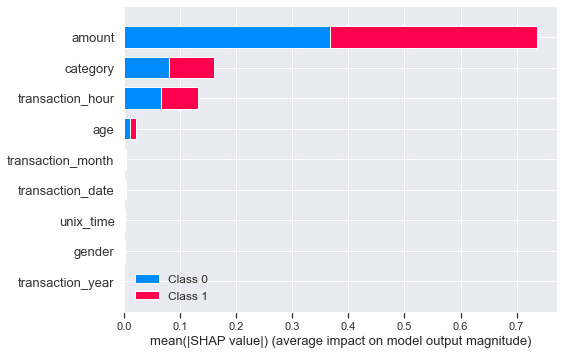

In [18]:


# Import the SHAP library
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_decision_tree_model)

# Calculate SHAP values for the testing data (replace X_test with your actual test data)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)


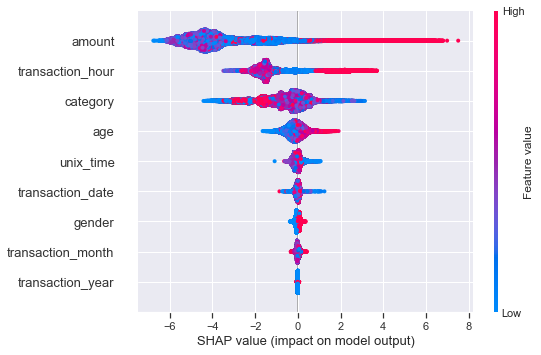

In [21]:



# Import the SHAP library
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(catboost_model)

# Calculate SHAP values for the testing data (replace X_test with your actual test data)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)

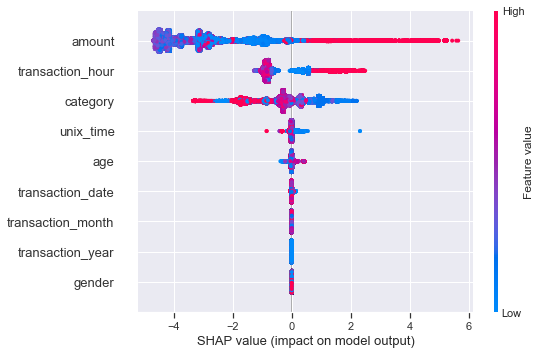

In [23]:


# Import the SHAP library
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(gradient_boosting_model)

# Calculate SHAP values for the testing data (replace X_test with your actual test data)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)

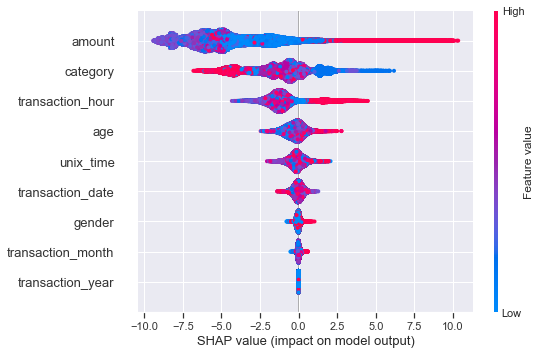

In [29]:


# Import the SHAP library
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for the testing data (replace X_test with your actual test data)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


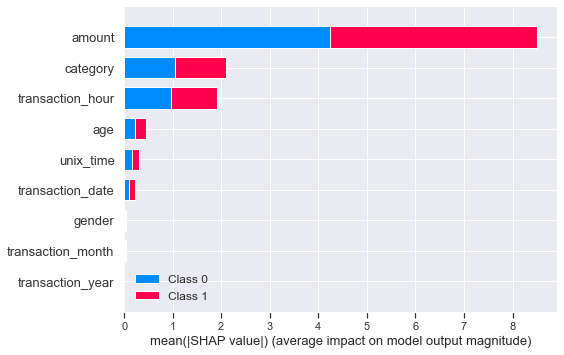

In [30]:
# Import the SHAP library
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(lgb_model)

# Calculate SHAP values for the testing data (replace X_test with your actual test data)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)

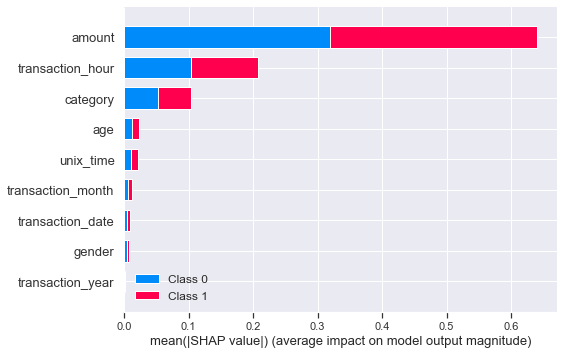

In [31]:
# Import the SHAP library
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for the testing data (replace X_test with your actual test data)
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)

In [34]:
from sklearn.model_selection import cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the GradientBoostingClassifier object, using the decision tree model as the base estimator
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the GradientBoostingClassifier on the training data
gradient_boosting_model.fit(X_train_resampled, y_train_resampled)


# Specify cross-validation settings
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(gradient_boosting_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

# Evaluate cross-validation results
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")


Mean Accuracy: 0.97
Standard Deviation: 0.01


In [37]:


from sklearn.model_selection import cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the DecisionTreeClassifier object
decision_tree_model = DecisionTreeClassifier(random_state=42)


# Specify cross-validation settings
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(decision_tree_model, X_train_hybridsampled, y_train_hybridsampled, cv=kfold, scoring='accuracy')

# Evaluate cross-validation results
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

Mean Accuracy: 0.99
Standard Deviation: 0.00


In [40]:
from sklearn.model_selection import cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the DecisionTreeClassifier object
decision_tree_model = DecisionTreeClassifier(random_state=42)


# Specify cross-validation settings
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(decision_tree_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

# Evaluate cross-validation results
mean_accuracy = scores.mean()
std_accuracy = scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")

Mean Accuracy: 0.97
Standard Deviation: 0.01


In [44]:
from sklearn.model_selection import cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Create the DecisionTreeClassifier object
decision_tree_model = DecisionTreeClassifier(random_state=42)


# Specify cross-validation settings
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(decision_tree_model, X_train_resampled, y_train_resampled, cv=kfold, scoring='recall')

# Evaluate cross-validation results
mean_f1score = scores.mean()
std_f1score = scores.std()
print(f"Mean f1-score: {mean_f1score:.2f}")
print(f"Standard Deviation: {std_f1score:.2f}")

Mean f1-score: 0.97
Standard Deviation: 0.01
